In [3]:
#imports 
import numpy as np
import pandas as pd
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error
from sklearn.naive_bayes import GaussianNB

In [4]:
data=sns.load_dataset('iris')

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
np.unique(data.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
def convert_val(val):
    if(val=='setosa'):
        return 0
    elif(val=='versicolor'):
        return 1
    else:
        return 2

data.species=data.species.apply(convert_val)

In [10]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

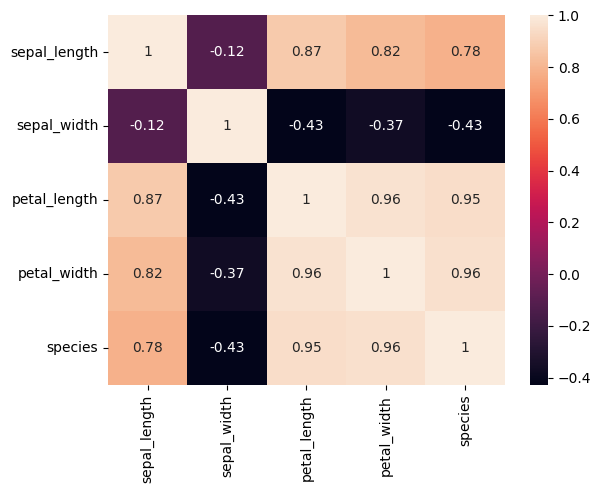

In [11]:
sns.heatmap(data.corr(),annot=True)

In [12]:
x=data[['sepal_length','sepal_width','petal_length','petal_width']]
y=data['species']

In [13]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [17]:
y_pred=model.predict(x_test)

In [18]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [19]:
y_test[:5]

73     1
18     0
118    2
78     1
76     1
Name: species, dtype: int64

In [20]:
conf_mat=confusion_matrix(y_test,y_pred)

<Axes: >

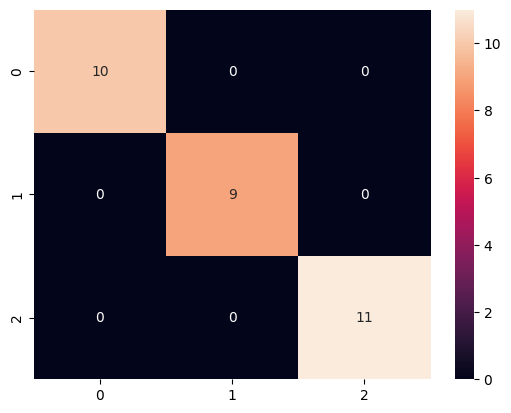

In [22]:
sns.heatmap(conf_mat,annot=True)

In [23]:
TP=conf_mat[1,1]
FP=conf_mat[0,1]
TN=conf_mat[0,0]
FN=conf_mat[1,0]

accuracy=(TP+TN)/(TP+FP+TN+FN)
error_rate=(FP+FN)/(TP+FP+TN+FN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0


<Axes: xlabel='species'>

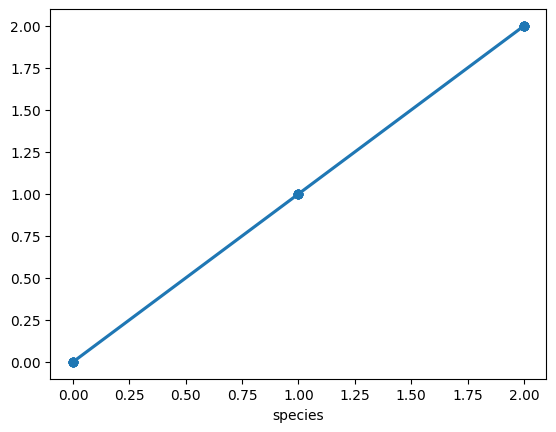

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=95)